In [50]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier


Create a new feature with the Title of each Passenger. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex  

/Users/gbokas/anaconda3/envs/snowflake/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/gbokas/anaconda3/envs/snowflake/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


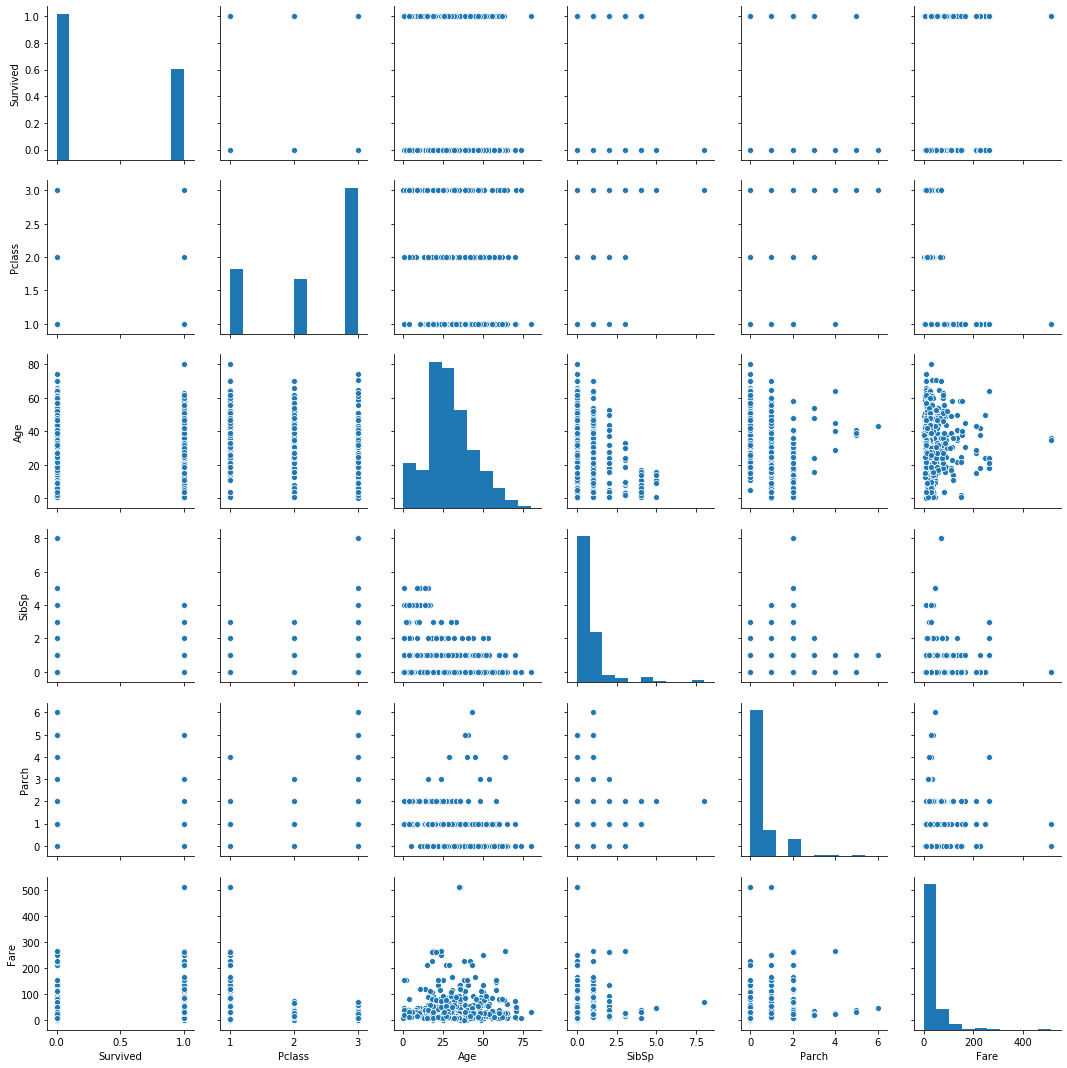

In [51]:
train=pd.read_csv("train.csv", index_col=0)
test=pd.read_csv("test.csv")
train.info()
test.info()


sns.pairplot(train, dropna=True)

In [52]:
train['Title'] = train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
test['Title'] = test.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
print(train.Title.value_counts())

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Don           1
Mme           1
Ms            1
Sir           1
Jonkheer      1
Capt          1
Lady          1
Countess      1
Name: Title, dtype: int64


Group the passenger by their title and find the average survival rate for each title.

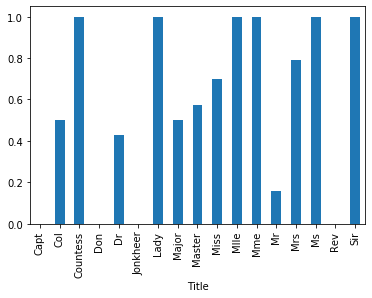

In [53]:
(train['Survived'].groupby(train['Title']).mean()).plot(kind='bar')


Also, check if the survival rate is correlated with the length of the passengers' name.
It seems that the survival rate increase with the length of the passenger's name.

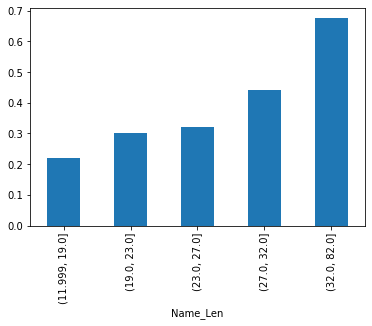

In [54]:
train['Name_Len']=train['Name'].apply(lambda x:len(x))
test['Name_Len']=test['Name'].apply(lambda x:len(x))
(train['Survived'].groupby(pd.qcut(train['Name_Len'],5)).mean()).plot(kind='bar')

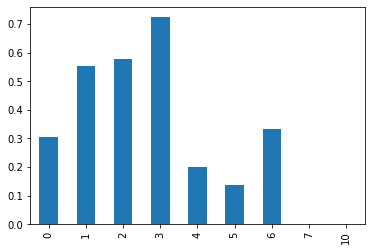

In [55]:
(train['Survived'].groupby(train['SibSp']+train['Parch']).mean()).plot(kind='bar')

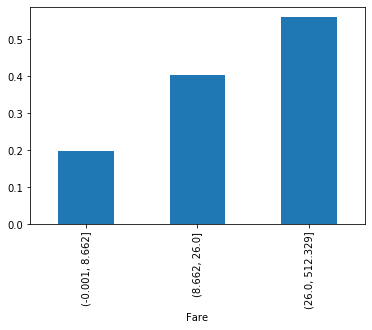

In [56]:
train['Survived'].groupby(pd.qcut(train['Fare'],3)).mean().plot(kind='bar')

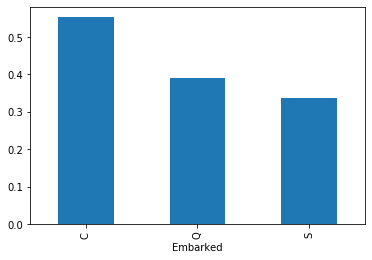

In [57]:
(train['Survived'].groupby(train['Embarked']).mean()).plot(kind='bar')

In [58]:
def fillMedian(df, column, returnType=int):
    df[column] = df[column].fillna(df[column].median())
    return df[column].astype(returnType)

train['Age']=fillMedian(train, "Age")
test['Age']=fillMedian(test, "Age")
train.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
 11  Title     891 non-null    object 
 12  Name_Len  891 non-null    int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 137.5+ KB


In [59]:
train['Embarked']=train['Embarked'].fillna('S')
test['Embarked']=test['Embarked'].fillna('S')
train.loc[train['Sex']=='male','Sex']=0
test.loc[test['Sex']=='male','Sex']=0
train.loc[train['Sex']=='female','Sex']=1
test.loc[test['Sex']=='female','Sex']=1
train.loc[train['Embarked']=='S','Embarked']=0
test.loc[test['Embarked']=='S','Embarked']=0
train.loc[train['Embarked']=='C','Embarked']=1
test.loc[test['Embarked']=='C','Embarked']=1
train.loc[train['Embarked']=='Q','Embarked']=2
test.loc[test['Embarked']=='Q','Embarked']=2
train.loc[train['Age'] <= 16, 'Age'] = 0
train.loc[(train['Age'] > 16) & (train['Age'] <= 32), 'Age'] = 1
train.loc[(train['Age'] > 32) & (train['Age'] <= 48), 'Age'] = 2
train.loc[(train['Age'] > 48) & (train['Age'] <= 64), 'Age'] = 3
train.loc[ train['Age'] > 64, 'Age'] = 4
test.loc[test['Age'] <= 16, 'Age'] = 0
test.loc[(test['Age'] > 16) & (test['Age'] <= 32), 'Age'] = 1
test.loc[(test['Age'] > 32) & (test['Age'] <= 48), 'Age'] = 2
test.loc[(test['Age'] > 48) & (test['Age'] <= 64), 'Age'] = 3
test.loc[ test['Age'] > 64, 'Age'] = 4
train['Embarked']=train['Embarked'].astype(int)
test['Embarked']=test['Embarked'].astype(int)
train['Sex']=train['Sex'].astype(int)
test['Sex']=test['Sex'].astype(int)
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 4, "Rev": 4, "Major":4, "Col":4, "Mile": 4, "Mme": 4, "Don": 4, "Lady": 4, "Countess": 4, "Jonkheer": 4, "Sir" : 4, "Capt": 4, "Ms": 4, "Dona": 4, "Mlle":4}
train['Title']=train['Title'].map(title_mapping)
test['Title']=test['Title'].map(title_mapping)
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1
train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [60]:
train['Fare']=fillMedian(train, "Fare", returnType=float)
test['Fare']=fillMedian(test, "Fare", returnType=float)

In [61]:
train.loc[ train['Fare'] <= 7.91, 'Fare'] = 0
test.loc[ test['Fare'] <= 7.91, 'Fare'] = 0
train.loc[(train['Fare'] > 7.91) & (train['Fare'] <= 14.454), 'Fare'] = 1
test.loc[(test['Fare'] > 7.91) & (test['Fare'] <= 14.454), 'Fare'] = 1
train.loc[(train['Fare'] > 14.454) & (train['Fare'] <= 31), 'Fare']   = 2
test.loc[(test['Fare'] > 14.454) & (test['Fare'] <= 31), 'Fare']   = 2
train.loc[ train['Fare'] > 31, 'Fare'] = 3
test.loc[ test['Fare'] > 31, 'Fare'] = 3
train['Fare'] = train['Fare'].astype(int)
test['Fare'] = test['Fare'].astype(int)
train.loc[ train['Name_Len'] <= 19, 'Name_Len'] = 0
test.loc[ test['Name_Len'] <= 19, 'Name_Len'] = 0
train.loc[(train['Name_Len'] > 19) & (train['Name_Len'] <= 23), 'Name_Len'] = 1
test.loc[(test['Name_Len'] > 19) & (test['Name_Len'] <= 23), 'Name_Len'] = 1
train.loc[(train['Name_Len'] > 23) & (train['Name_Len'] <= 27), 'Name_Len'] = 2
test.loc[(test['Name_Len'] > 23) & (test['Name_Len'] <= 27), 'Name_Len'] = 2
train.loc[(train['Name_Len'] > 27) & (train['Name_Len'] <= 32), 'Name_Len'] = 3
test.loc[(test['Name_Len'] > 27) & (test['Name_Len'] <= 32), 'Name_Len'] = 3
train.loc[ train['Name_Len'] > 32, 'Name_Len'] = 3
test.loc[ test['Name_Len'] > 32, 'Name_Len'] = 3
drop_elements=['Cabin', 'Name', 'Ticket', 'Parch', 'SibSp',]
train=train.drop(drop_elements, axis =1)
test=test.drop(drop_elements, axis =1)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Survived    891 non-null    int64
 1   Pclass      891 non-null    int64
 2   Sex         891 non-null    int64
 3   Age         891 non-null    int64
 4   Fare        891 non-null    int64
 5   Embarked    891 non-null    int64
 6   Title       891 non-null    int64
 7   Name_Len    891 non-null    int64
 8   FamilySize  891 non-null    int64
dtypes: int64(9)
memory usage: 109.6 KB


In [62]:
print(train.head())
test.info()

             Survived  Pclass  Sex  Age  Fare  Embarked  Title  Name_Len  \
PassengerId                                                                
1                   0       3    0    1     0         0      1         1   
2                   1       1    1    2     3         1      3         3   
3                   1       3    1    1     1         0      2         1   
4                   1       1    1    2     3         0      3         3   
5                   0       3    0    2     1         0      1         2   

             FamilySize  
PassengerId              
1                     2  
2                     2  
3                     1  
4                     2  
5                     1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Pclass       418 non-null    int64
 2   Sex          418

In [63]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop("PassengerId", axis=1).copy()
print(X_train.shape, Y_train.shape, X_test.shape)

(891, 8) (891,) (418, 8)


In [64]:
logreg=LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred=logreg.predict(X_test)
acc_log=round(logreg.score(X_train, Y_train)*100, 2)
print(acc_log)
coeff_df = pd.DataFrame(train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])
print(coeff_df.sort_values(by='Correlation', ascending=False))

81.26
      Feature  Correlation
1         Sex     2.042506
5       Title     0.603788
4    Embarked     0.285646
3        Fare     0.272537
6    Name_Len     0.165285
7  FamilySize    -0.415943
2         Age    -0.556881
0      Pclass    -0.855707


In [65]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
print(acc_svc)

83.39


In [66]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
print(acc_knn)

87.21


In [67]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
print(acc_decision_tree)

91.36


In [69]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(acc_random_forest)

91.36


In [70]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('submission.csv', index=False)

In [73]:
for name, importance in zip(train.columns, random_forest.feature_importances_):
    print(name, "=", importance)

Survived = 0.12485303884933331
Pclass = 0.1571524404945839
Sex = 0.0932281624909735
Age = 0.098517627386585
Fare = 0.057736806793426215
Embarked = 0.2208007971983629
Title = 0.11407938226334087
Name_Len = 0.13363174452339438


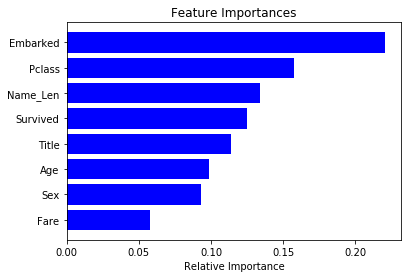

In [74]:
features = train.columns
importances = random_forest.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()